#### **CCA 上位n%区分によるポートフォリオの作成と、等ポートフォリオとのリターン比較**

In [14]:
from helpers import *

In [15]:
df = pd.read_csv('../../DATAHUB/aba922ff-cef0-4bc7-8899-00fc08a14023.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

df

,DATE,TICKER,TOTAL_SALES
0,2013-01-01,2138,985151
1,2013-02-01,2138,1177610
2,2013-03-01,2138,1852193
3,2013-04-01,2138,1595681
4,2013-05-01,2138,1997601
...,...,...,...
38970,2025-02-01,u_YDBS,1233451190
38971,2025-03-01,u_YDBS,1447258480
38972,2025-04-01,u_YDBS,1258859842
38973,2025-05-01,u_YDBS,1199917267


In [16]:
# データ読み込みとフィルタリング
df_filtered = filter_data_cca(df)

df_filtered

original data: 38975
filtered data: 35249


,DATE,TICKER,TOTAL_SALES
0,2013-01-01,2138,985151
1,2013-02-01,2138,1177610
2,2013-03-01,2138,1852193
3,2013-04-01,2138,1595681
4,2013-05-01,2138,1997601
...,...,...,...
35264,2025-02-01,9997,59219415
35265,2025-03-01,9997,78720890
35266,2025-04-01,9997,67881188
35267,2025-05-01,9997,67086649


In [17]:
df_monthly = daily_to_monthly(df_filtered, 'TOTAL_SALES')
df_monthly

original data: 35249
monthly data: 35247


,MONTH,TICKER,TOTAL_SALES
0,2013-01,2138,985151
1,2013-01,2157,1377478
2,2013-01,2193,2924974
3,2013-01,2211,2532392
4,2013-01,2267,238000
...,...,...,...
35242,2025-06,9974,101503788
35243,2025-06,9983,363073664
35244,2025-06,9984,697536023
35245,2025-06,9989,106444241


In [18]:
df_yoy = calculate_yoy(df_monthly, 'TOTAL_SALES')
df_yoy

original data: 35247
yoy data: 32388


,MONTH,TICKER,TOTAL_SALES,YOY
2694,2014-01,2138,3470893,3.523209
2695,2014-01,2157,2673437,1.940820
2696,2014-01,2193,4141117,1.415779
2697,2014-01,2211,2892187,1.142077
2698,2014-01,2267,240100,1.008824
...,...,...,...,...
35242,2025-06,9974,101503788,0.323195
35243,2025-06,9983,363073664,0.272869
35244,2025-06,9984,697536023,0.115338
35245,2025-06,9989,106444241,0.278771


In [19]:
# price dataの読み込み
price_data = pd.read_csv('../../DATAHUB/Price_Data/price_data_for_cca.csv')
price_data

,DATE,TICKER,PRICE,DIVIDENDS,MONTHLY_RETURN
0,2013-01,2138,923.174316,0.0,NaN
1,2013-02,2138,1558.038574,0.0,0.687697
2,2013-03,2138,1587.160767,15.0,0.028319
3,2013-04,2138,1977.104126,0.0,0.245686
4,2013-05,2138,3473.158691,0.0,0.756690
...,...,...,...,...,...
30499,2025-02,5032,2811.156250,0.0,-0.110972
30500,2025-03,5032,3201.704834,0.0,0.138928
30501,2025-04,5032,3667.587646,32.5,0.155662
30502,2025-05,5032,3950.000000,0.0,0.077002


In [20]:
# percentiles = [10, 25, 40, 100]

multiple_portfolios = create_multiple_portfolios(df_yoy, price_data, percentiles=[5, 55, 100])
multiple_portfolios

上位5%のポートフォリオを作成中...


ポートフォリオ銘柄数: 12
ポートフォリオに含まれた銘柄: ['2371' '3994' '4478' '7323' '7618' '7780' '7974' '8273' '8715' '9412'
 '9468' '9861']
上位55%のポートフォリオを作成中...
ポートフォリオ銘柄数: 130
ポートフォリオに含まれた銘柄: ['2157' '2211' '2371' '2651' '2659' '2670' '2681' '2695' '2730' '2742'
 '2752' '2764' '2780' '2782' '2790' '2798' '2910' '2929' '3038' '3046'
 '3048' '3050' '3053' '3064' '3088' '3091' '3093' '3097' '3148' '3180'
 '3191' '3197' '3333' '3341' '3349' '3359' '3382' '3387' '3391' '3395'
 '3397' '3539' '3542' '3543' '3561' '3563' '3635' '3660' '3938' '3994'
 '4344' '4448' '4478' '4479' '4661' '4686' '4751' '5138' '5261' '6036'
 '6096' '6724' '7082' '7110' '7323' '7419' '7453' '7516' '7532' '7545'
 '7550' '7564' '7581' '7606' '7618' '7649' '7780' '7816' '7911' '7936'
 '7937' '7974' '8028' '8153' '8160' '8163' '8167' '8173' '8179' '8182'
 '8185' '8194' '8200' '8214' '8218' '8219' '8242' '8255' '8273' '8279'
 '8282' '8715' '9008' '9009' '9021' '9022' '9042' '9201' '9206' '9338'
 '9412' '9424' '9438' '9468' '9601' '9603' '9627

,top_5p,top_55p,top_100p
MONTH,,,
2014-01,-0.018343,0.001002,-0.012897
2014-02,-0.024321,-0.003264,-0.011973
2014-03,0.018030,0.032151,0.028409
2014-04,0.024085,-0.011135,-0.006970
2014-05,0.007498,0.021449,0.029427
...,...,...,...
2025-02,-0.016276,-0.022659,-0.020038
2025-03,0.011416,0.027451,0.020226
2025-04,0.055690,0.057479,0.045698


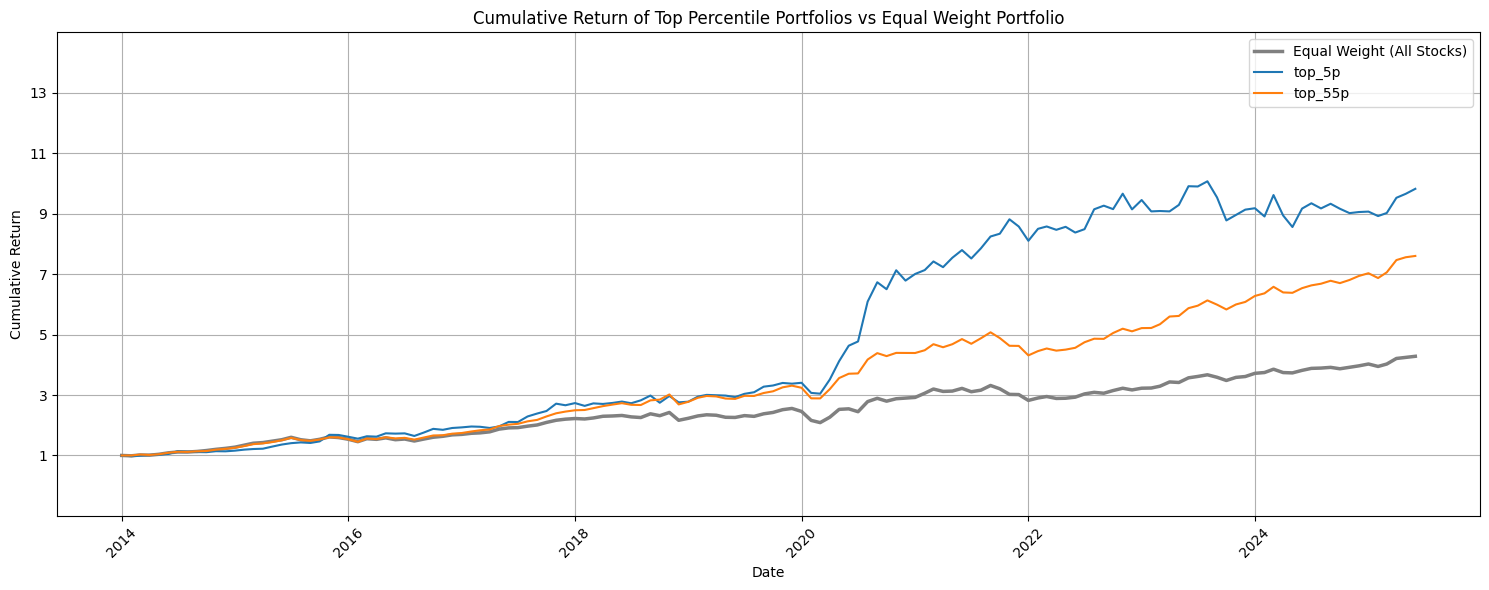

In [21]:
# set date index
multiple_portfolios.index = pd.to_datetime(multiple_portfolios.index)

# 可視化
plot_portfolio_returns(multiple_portfolios)

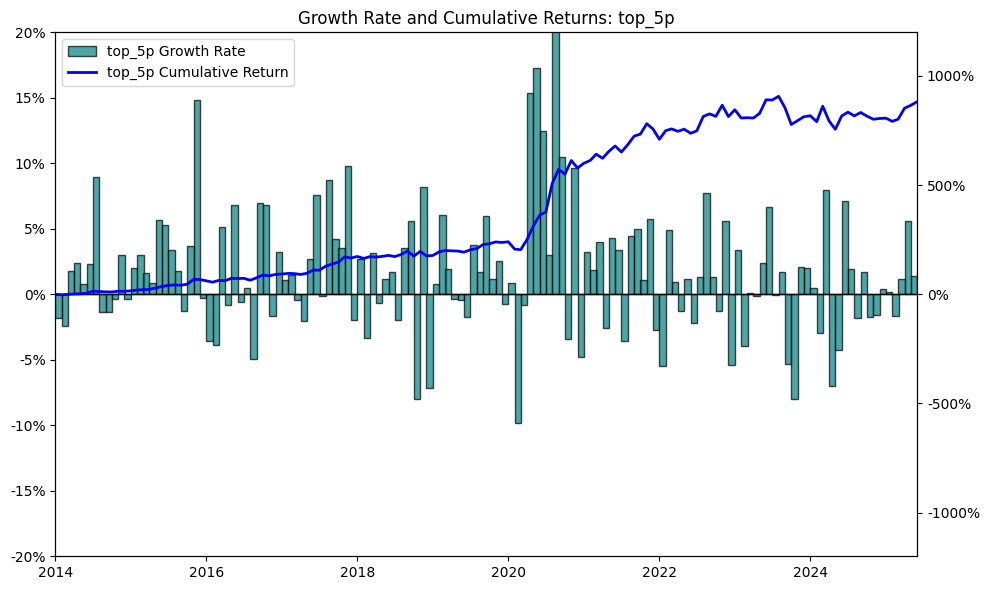

In [23]:
plot_growth_rate(multiple_portfolios, 'top_5p')

In [ ]:
# パフォーマンス指標計算
print("パフォーマンス指標を計算中...")
performance_metrics = calculate_performance_metrics(multiple_portfolios)

print("\n=== パフォーマンス指標 ===")
print(performance_metrics.round(2))


パフォーマンス指標を計算中...

=== パフォーマンス指標 ===
          Total Return (%)  Annual Return (%)  Monthly Return (%)  \
top_5p              864.21              21.78                1.77   
top_10p             859.77              21.73                1.74   
top_15p             871.96              21.87                1.74   
top_20p             961.97              22.81                1.80   
top_25p            1003.23              23.22                1.83   
top_30p             997.02              23.16                1.82   
top_35p             942.19              22.61                1.78   
top_40p             926.06              22.44                1.76   
top_45p             744.31              20.38                1.62   
top_50p             712.88              19.99                1.59   
top_55p             660.88              19.30                1.54   
top_60p             630.20              18.87                1.51   
top_65p             573.52              18.04                1.45  

In [ ]:
# 月次統計計算
print("\n=== 月次リターンの詳細統計 ===")
monthly_stats = calculate_monthly_statistics(multiple_portfolios)
print(monthly_stats.round(2))



=== 月次リターンの詳細統計 ===
          月次平均リターン (%)  月次ボラティリティ (%)  最小月次リターン (%)  最大月次リターン (%)  中央値 (%)
top_5p            1.77           5.03         -9.84         27.65     1.36
top_10p           1.74           4.18        -10.81         20.18     1.30
top_15p           1.74           3.95        -11.14         18.94     1.79
top_20p           1.80           3.94        -11.04         16.51     1.73
top_25p           1.83           3.81        -10.88         15.01     2.22
top_30p           1.82           3.77        -11.44         14.56     2.22
top_35p           1.78           3.66        -11.24         13.87     1.94
top_40p           1.76           3.46        -10.57         12.92     2.04
top_45p           1.62           3.44        -10.75         12.49     1.90
top_50p           1.59           3.39        -10.72         12.25     1.88
top_55p           1.54           3.36        -10.91         12.38     1.90
top_60p           1.51           3.31        -10.99         12.18     1.79
top_

In [ ]:
# 最終累積リターン計算
print("\n=== 最終累積リターン ===")
final_returns = calculate_final_returns(multiple_portfolios)
print(final_returns.to_string(index=False))



=== 最終累積リターン ===
Portfolio  Final Return
  top_25p         11.03
  top_30p         10.97
  top_20p         10.62
  top_35p         10.42
  top_40p         10.26
  top_15p          9.72
   top_5p          9.64
  top_10p          9.60
  top_45p          8.44
  top_50p          8.13
  top_55p          7.61
  top_60p          7.30
  top_65p          6.74
  top_70p          6.26
  top_75p          5.64
  top_80p          5.36
  top_85p          5.00
  top_90p          4.65
  top_95p          4.40
 top_100p          4.23


In [ ]:
# 分析結果サマリー
generate_analysis_summary(multiple_portfolios, df_yoy, performance_metrics)


=== 分析結果サマリー ===
分析期間: 2014-01-01 00:00:00 から 2025-06-01 00:00:00
対象銘柄数: 238
分析したポートフォリオ: ['top_5p', 'top_10p', 'top_15p', 'top_20p', 'top_25p', 'top_30p', 'top_35p', 'top_40p', 'top_45p', 'top_50p', 'top_55p', 'top_60p', 'top_65p', 'top_70p', 'top_75p', 'top_80p', 'top_85p', 'top_90p', 'top_95p', 'top_100p']

最高パフォーマンス: top_25p (1003.23%)
最低パフォーマンス: top_100p (322.57%)

最高シャープレシオ: top_40p (1.87)
最低最大ドローダウン: top_100p (-18.34%)

=== パーセンタイルポートフォリオ間の比較 ===
最高パーセンタイル: top_25p (1003.23%)
最低パーセンタイル: top_100p (322.57%)
